# Setup

In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import pandas as pd
from pandas import tseries
from datetime import datetime
from datetime import timedelta
import seaborn as sns

import reporterFun as rf

reporter, dayReporter, sleepReporter, wakeReporter = rf.GetReporterData()

Int64Index([   8,   21,   37,   56,   72,   89,  107,  125,  142,  168,  175,
             187,  204,  223,  239,  254,  268,  299,  323,  339,  358,  375,
             393,  411,  427,  459,  491,  506,  522,  542,  561,  590,  601,
             618,  636,  651,  697,  714,  730,  749,  783,  801,  811,  824,
             842,  852,  854,  869,  884,  902,  938,  955,  972, 1036, 1058,
            1078, 1098, 1119, 1134, 1151, 1169, 1182, 1196, 1200, 1221, 1240],
           dtype='int64')
Int64Index([   9,   22,   38,   57,   73,   90,  108,  126,  143,  169,  176,
             188,  205,  224,  240,  255,  269,  300,  324,  340,  359,  376,
             394,  412,  428,  460,  492,  507,  523,  543,  562,  602,  619,
             637,  652,  698,  715,  731,  750,  784,  802,  812,  825,  843,
             853,  855,  870,  885,  903,  939,  956,  973, 1037, 1059, 1079,
            1099, 1120, 1135, 1152, 1170, 1183, 1197, 1201, 1222, 1241],
           dtype='int64')
590
Int64Index([

reporterFun.py:90: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  sleepSeries.drop(sleepSeries.index[i], inplace=True)


# Analyse Mood Patterns

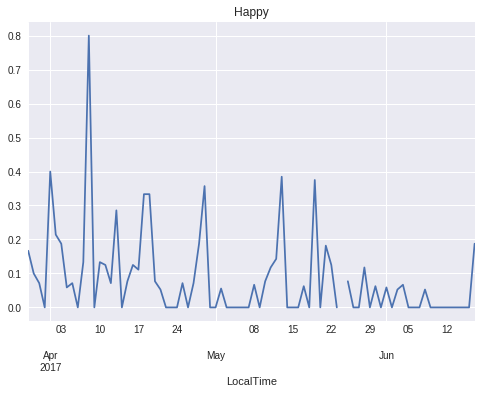

In [10]:
rf.displayToken(dayReporter, 'Mood', 'Content', display='Time')

Moods will need to be mashed together.
For example:

##### Positive vs. Negative

Positive: Calm, Content, Excited, Focused, Happy, Impressed, Interested, Productive, Quiet, Satisfied

Negative: Ashamed, Bored, Distracted, Embarrassed, Irritated, Nervous, Reluctant, Restless, Sad, Stressed, Unproductive, Unsatisfied, Upset

In [3]:
uniqueMoods = rf.getUnique(reporter['Mood'])
print uniqueMoods

moodHot = rf.populateBinaryCols(reporter['Mood'])

['Amused' 'Angry' 'Ashamed' 'Awkward' 'Bored' 'Calm' 'Cautious'
 'Conflicted' 'Confused' 'Content' 'Depressed' 'Determined' 'Disappointed'
 'Disgusted' 'Distracted' 'Drunk' 'Embarrassed' 'Energetic'
 'Enjoying Myself' 'Euphoric' 'Excited' 'Exhausted' 'Focused' 'Foolish'
 'Frustrated' 'Full' 'Grateful' 'Guilty' 'Happy' 'Hopeful' 'Hot' 'Hungry'
 'Ill' 'Impatient' 'Impressed' 'Interested' 'Irritated' 'Melancholy'
 'Nervous' 'None' 'Nostalgic' 'Pain' 'Pleased' 'Productive' 'Proud' 'Quiet'
 'Regret' 'Relaxed' 'Relieved' 'Reluctant' 'Resignation' 'Restless' 'Sad'
 'Satisfied' 'Self-pity' 'Shy' 'Stressed' 'Struggling' 'Stuck' 'Tense'
 'Thoughtful' 'Tired' 'Unproductive' 'Unsatisfied' 'Upset' 'Weary'
 'Wistful' 'Worried']


Add values or simply create one hot for any positive mood?

In [4]:
positiveMood = moodHot['Calm'] + (moodHot['Content'] + moodHot['Excited'] + moodHot['Focused'] + moodHot['Happy'] + 
                                  moodHot['Impressed'] + moodHot['Interested'] + moodHot['Productive'] +
                                  moodHot['Satisfied'])

positiveMood2 = moodHot['Calm'] | (moodHot['Content'] | moodHot['Excited'] | moodHot['Focused'] | moodHot['Happy'] | 
                                  moodHot['Impressed'] | moodHot['Interested'] | moodHot['Productive'] |
                                  moodHot['Satisfied'])

Pairwise correlation between moods doesn't work because they're binary, so there are only four possible combinations.

In [5]:
moodHot = rf.populateBinaryCols(reporter['Mood'])

#moodHot.iloc[:,0:3]
#plot_moods = list(moodHot.loc[:,'Ashamed':'Bored']) + ['Ill']
plot_moods = ['Tired'] + ['Distracted']
#sns.pairplot(moodHot[plot_moods])

Resample moods to aggregate them over a single day (beginning at 5 o'clock). This should give a distribution that can be correlated: being tired more over a single day can be correlated with being bored more over a single day. Problem that few tokens have high numbers within a day, making the regression unreliable.

In [6]:
uniqueMoods = rf.getUnique(reporter['Mood'])
print uniqueMoods
moodHot = rf.populateBinaryCols(reporter['Mood'])
moodHot.index = reporter['LocalTime']
resampledMood = moodHot.resample('24H', base = 5)
resampledMood = resampledMood.sum()

#sns.pairplot(resampledMood.loc[:, (resampledMood.sum() > 40)], kind="reg") # pairwise comparison of moods which have more than 10 datapoints

['Amused' 'Angry' 'Ashamed' 'Awkward' 'Bored' 'Calm' 'Cautious'
 'Conflicted' 'Confused' 'Content' 'Depressed' 'Determined' 'Disappointed'
 'Disgusted' 'Distracted' 'Drunk' 'Embarrassed' 'Energetic'
 'Enjoying Myself' 'Euphoric' 'Excited' 'Exhausted' 'Focused' 'Foolish'
 'Frustrated' 'Full' 'Grateful' 'Guilty' 'Happy' 'Hopeful' 'Hot' 'Hungry'
 'Ill' 'Impatient' 'Impressed' 'Interested' 'Irritated' 'Melancholy'
 'Nervous' 'None' 'Nostalgic' 'Pain' 'Pleased' 'Productive' 'Proud' 'Quiet'
 'Regret' 'Relaxed' 'Relieved' 'Reluctant' 'Resignation' 'Restless' 'Sad'
 'Satisfied' 'Self-pity' 'Shy' 'Stressed' 'Struggling' 'Stuck' 'Tense'
 'Thoughtful' 'Tired' 'Unproductive' 'Unsatisfied' 'Upset' 'Weary'
 'Wistful' 'Worried']


Now try with some merged datasets:

['Amused' 'Angry' 'Ashamed' 'Awkward' 'Bored' 'Calm' 'Cautious'
 'Conflicted' 'Confused' 'Content' 'Depressed' 'Determined' 'Disappointed'
 'Disgusted' 'Distracted' 'Drunk' 'Embarrassed' 'Energetic'
 'Enjoying Myself' 'Euphoric' 'Excited' 'Exhausted' 'Focused' 'Foolish'
 'Frustrated' 'Full' 'Grateful' 'Guilty' 'Happy' 'Hopeful' 'Hot' 'Hungry'
 'Ill' 'Impatient' 'Impressed' 'Interested' 'Irritated' 'Melancholy'
 'Nervous' 'None' 'Nostalgic' 'Pain' 'Pleased' 'Productive' 'Proud' 'Quiet'
 'Regret' 'Relaxed' 'Relieved' 'Reluctant' 'Resignation' 'Restless' 'Sad'
 'Satisfied' 'Self-pity' 'Shy' 'Stressed' 'Struggling' 'Stuck' 'Tense'
 'Thoughtful' 'Tired' 'Unproductive' 'Unsatisfied' 'Upset' 'Weary'
 'Wistful' 'Worried']


ValueError: max must be larger than min in range parameter.

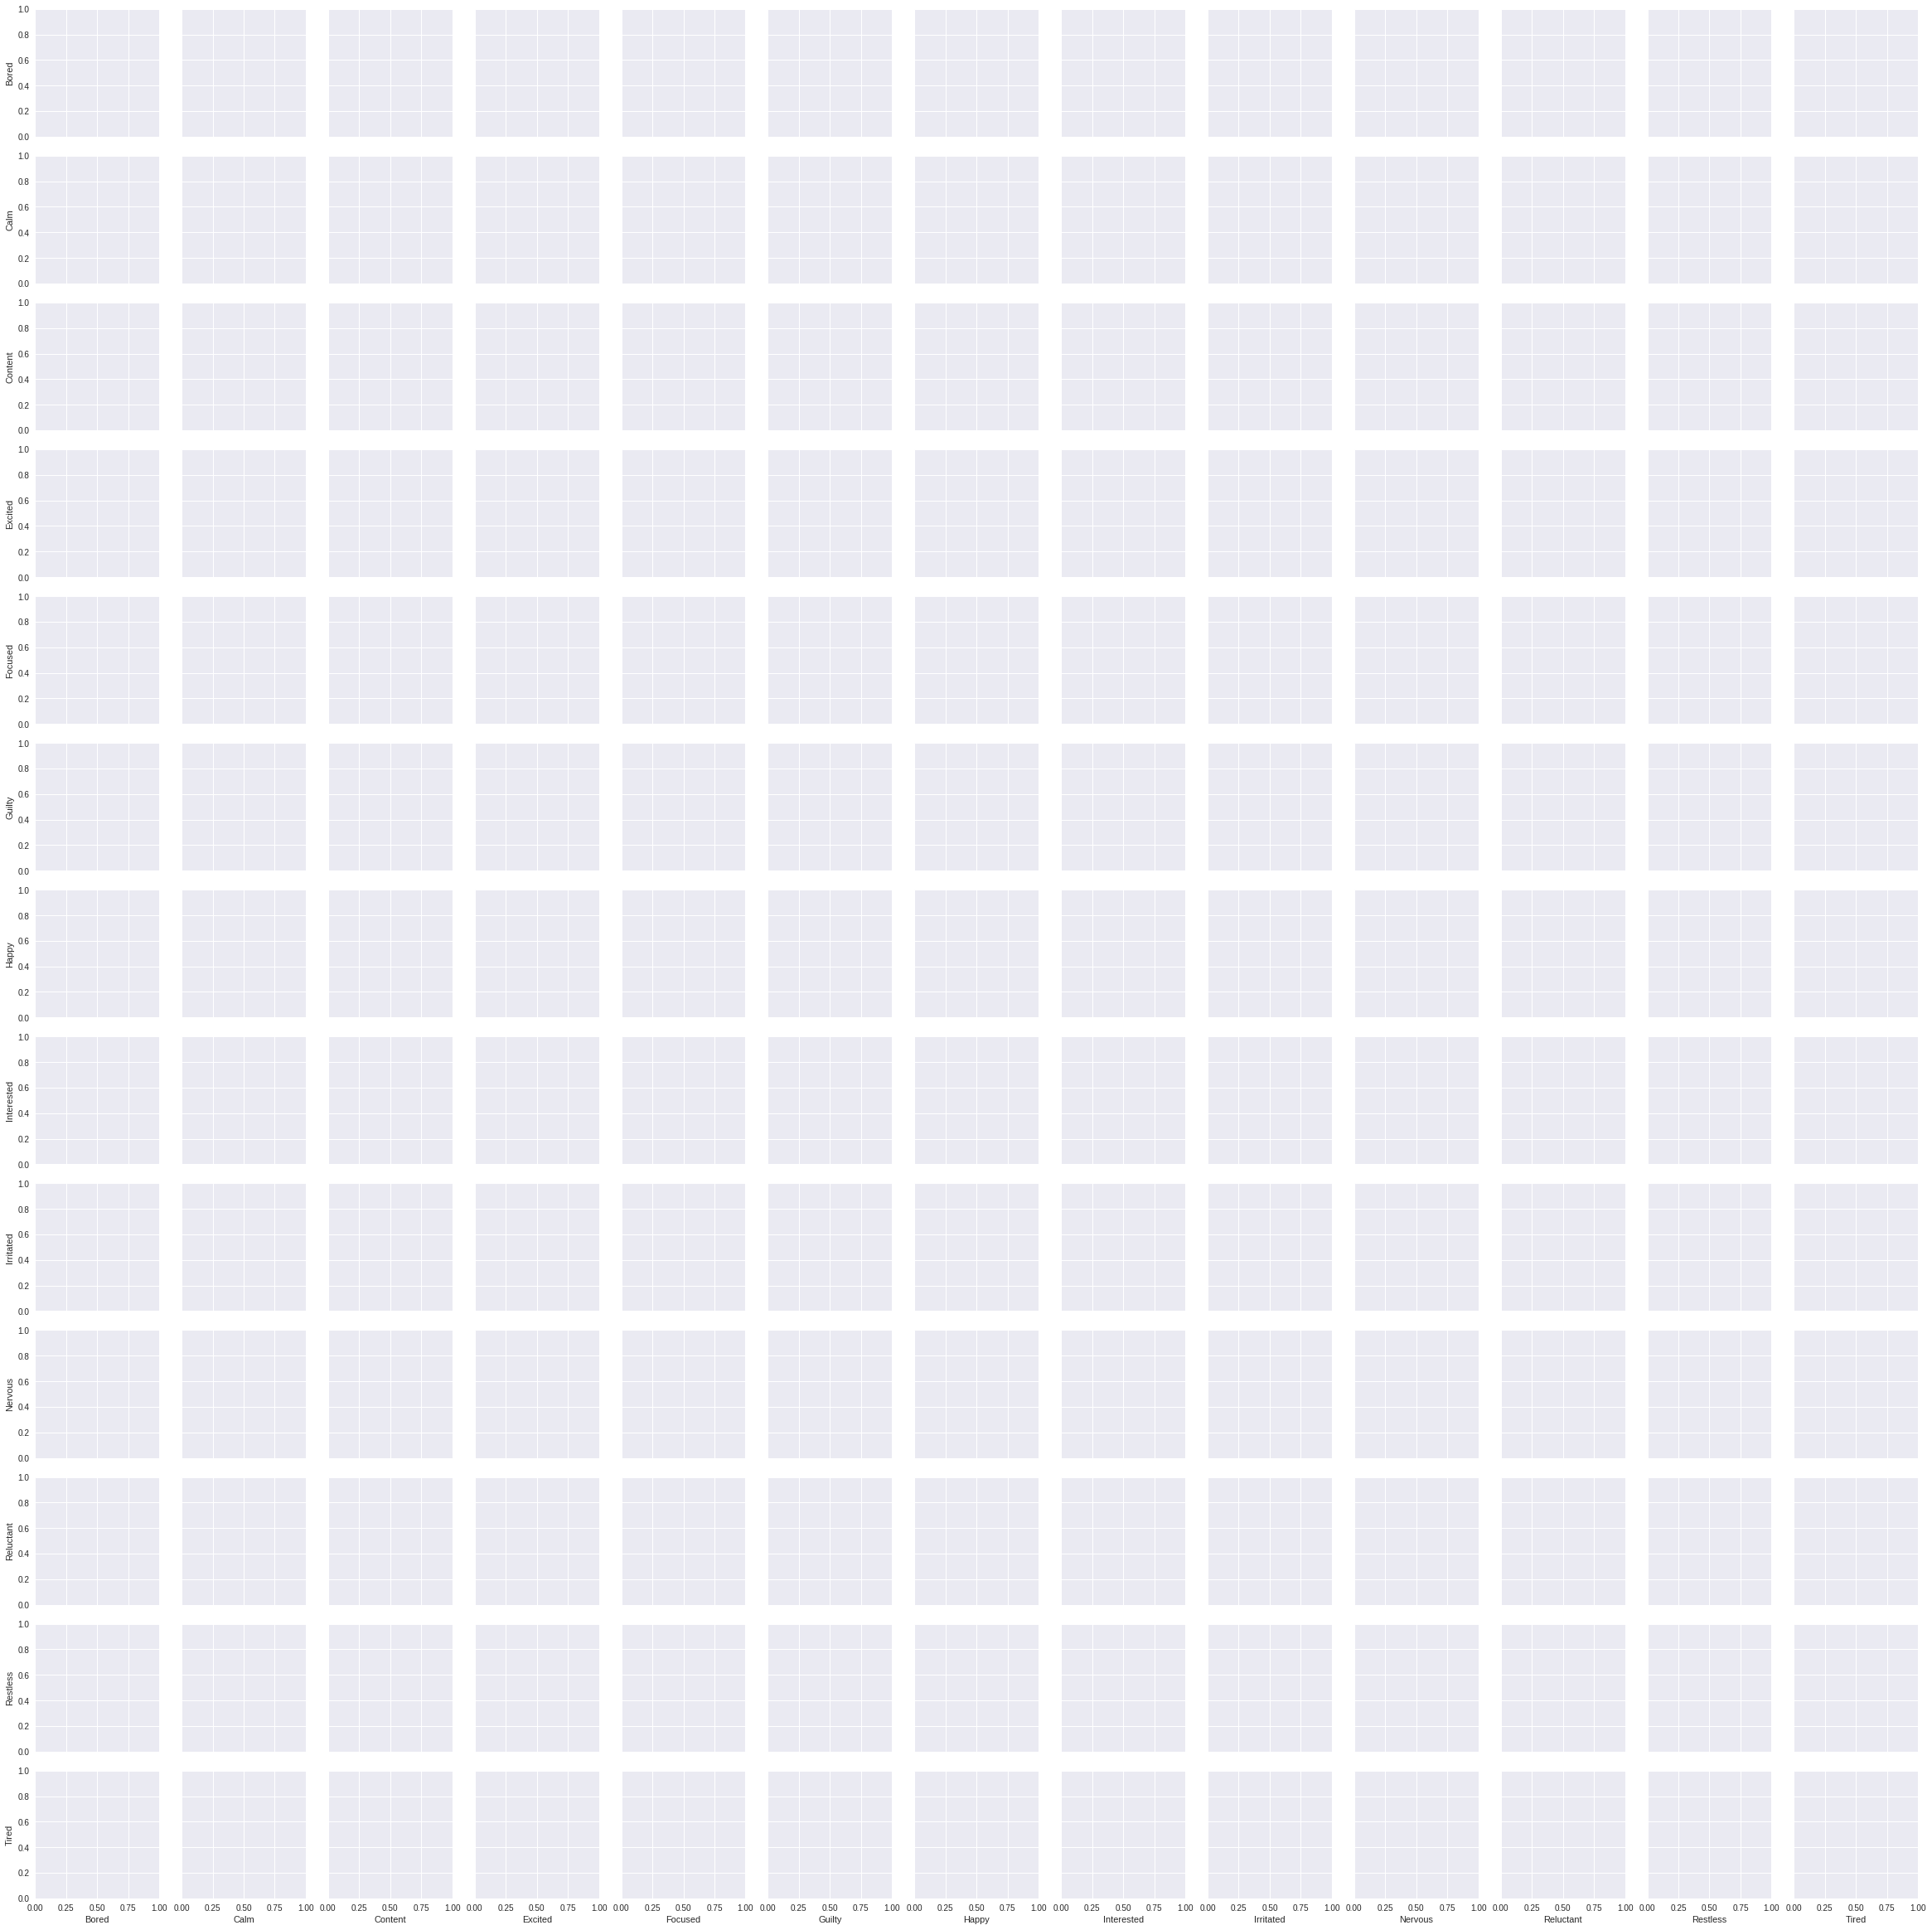

In [7]:
uniqueMoods = rf.getUnique(reporter['Mood'])
print uniqueMoods
moodHot = rf.populateBinaryCols(reporter['Mood'])
moodHot.index = reporter['LocalTime']
resampledMood = moodHot.resample('24H', base = 5)

resampledMood = resampledMood.sum()
resampledMood['Restless']+=resampledMood['Distracted']; del resampledMood['Distracted']
resampledMood['Guilty']+=resampledMood['Ashamed']+resampledMood['Embarrassed']; del resampledMood['Ashamed']; del resampledMood['Embarrassed']
resampledMood['Frustrated']+=resampledMood['Impatient']; del resampledMood['Impatient']
resampledMood['Nervous']+=resampledMood['Worried']; del resampledMood['Worried']

sns.pairplot(resampledMood.loc[:, (resampledMood.sum() > 40)], kind="reg") # pairwise comparison of moods which have more than 10 datapoints